# Práctico 1: Recomendación de Artistas

En este práctico trabajaremos con el conjuto de datos de [LastFM](https://grouplens.org/datasets/hetrec-2011/) para el desarrollo de un sistema de recomendación que, dado el nombre de un artista musical, devuelve una lista de artistas "similares".

Para el práctico utilizaremos el conjunto de datos de LastFM que consiguieron del [notebook de instalación](./instalacion.ipynb). Se recomienda leer el [Readme](http://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-readme.txt) de los datos para saber más sobre que información contiene cada archivo.

La idea del práctico es hacer un análisis muy sencillo del conjunto de datos y desarrollar un sistema de recomendación basado en filtrado colaborativo (usando Surpr!se), a partir de los datos existentes.

In [1]:
import pandas as pd

In [3]:
artist_data = pd.read_csv("./data/artists.dat", sep="\t")
#artist_data['id'].unique()
artist_data.head()


id             int64
name          object
url           object
pictureURL    object
dtype: object

# Procedemos a abrir las bases de datos necesarias#

In [5]:
user_artist_plays = pd.read_csv("./data/user_artists.dat", sep="\t")
genero = pd.read_csv("./data/tags.dat",sep= '\t', encoding='cp1252')
artistgenero = pd.read_csv("./data/user_taggedartists.dat", sep="\t")


userID      int64
artistID    int64
weight      int64
dtype: object

## Ejercicio 1 - Análisis Exploratorio de Datos

En esta primera parte deberán hacer un análisis exploratorio de los datos, aprovechando toda la información brindada por el conjunto. A partir de eso podrán tener mayor idea de qué tipo de datos estarán enfrentando (describe o hist).

Algunas preguntas para responder:
- ¿Cuáles son los artistas que fueron más escuchados?
- ¿Cómo es la distribución de cantidad de listens por user?
- ¿Es posible ver el género más escuchado?

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
user_artist_plays.columns

Index(['userID', 'artistID', 'weight'], dtype='object')

**Primero vamos a conocer un poco el dataset, queremos ver cual es el artista con menos listens por user**

In [76]:
mean_weights = user_artist_plays.groupby('artistID')[['weight']].mean()
lowest_weight = mean_weights['weight'].idxmin()
user_artist_plays[user_artist_plays['artistID'] == lowest_weight]

,userID,artistID,weight
1609,35,1173,1


In [75]:
artist_data[artist_data['id']==1173] 

,id,name,url,pictureURL
1164,1173,Quidam,http://www.last.fm/music/Quidam,http://userserve-ak.last.fm/serve/252/2770979.jpg


**Y ahora veremos cual es el de mayor weight**

In [77]:
highest_weight = mean_weights['weight'].idxmax()
user_artist_plays[user_artist_plays['artistID'] == highest_weight]

,userID,artistID,weight
27438,596,8388,35323


In [78]:
artist_data[artist_data['id']==596] #Resultado RARO

,id,name,url,pictureURL
590,596,The Montesas,http://www.last.fm/music/The+Montesas,http://userserve-ak.last.fm/serve/252/147639.gif


# Para resolver la primera consigna y conocer los artistas más escuchados, buscamos en la base de users los 'artistID' que aparecieron más frecuentemente#

Text(0, 0.5, 'ID de los artistas')

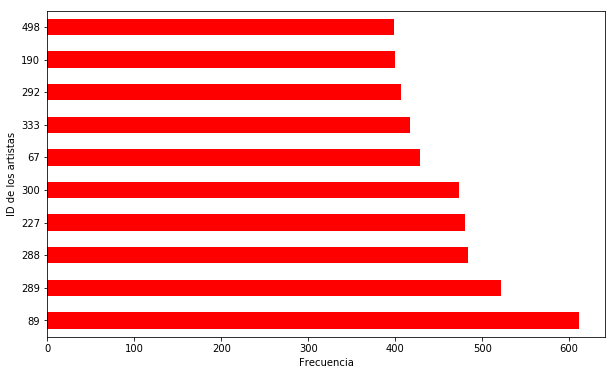

In [8]:
plt.figure(figsize=(10,6))
user_artist_plays.artistID.value_counts().head(10).plot(kind='barh', color='#FF0000')
plt.xlabel('Frecuencia')
plt.ylabel('ID de los artistas')

# Podemos observar que el top 10 de los artistas más escuchados corresponden a los ID observados en la lista:
89 : Lady Gaga,
289 : Britney Spears,
288 : Rihanna,
227 : The Beatles,
300 : Katy Perry,
67 : Madonna,
333 : Avril Lavinge,
292 : Christina Aguilera,
190 : Muse,
498 : Paramore.

In [9]:
#El siguiente código lo usamos para conocer a que nombre del artista corresponde cada ID
artist_data[artist_data['id']==498] 

,id,name,url,pictureURL
492,498,Paramore,http://www.last.fm/music/Paramore,http://userserve-ak.last.fm/serve/252/35837991...


# En la siguiente tarea vamos a observar la distribución de la cantidad de listens por users

In [10]:
#Comenzamos por un análisis exploratorio de la variable 'weight'
user_artist_plays.weight.describe()

count     92834.00000
mean        745.24393
std        3751.32208
min           1.00000
25%         107.00000
50%         260.00000
75%         614.00000
max      352698.00000
Name: weight, dtype: float64

**Se puede observar que le promedio de listens para el total de users es de 745 listens, donde la mínima cantidad de listens fue 1 y la máxima fue de 352698. Podemos inferir que aquellos que tuvieron sólo un listen denota que lo escuchado no les gustó lo suficiente para volverlo a escuchar.**

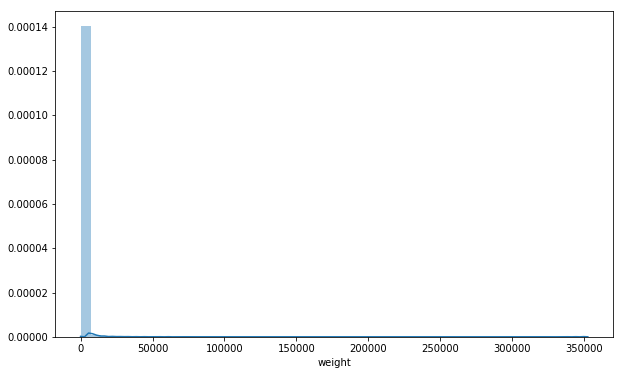

In [11]:
#Para conocer como se distribuyen los datos de listens realizamos un histograma
plt.figure(figsize=(10,6))
sns.distplot(user_artist_plays['weight']);

In [12]:
# Asimetría y curtosis:

print("Skewness: %f" % user_artist_plays['weight'].skew())
print("Kurtosis: %f" % user_artist_plays['weight'].kurt())


Skewness: 43.269718
Kurtosis: 2893.739086


**Existe un moda acentuada entre los valores de 1 a 610, por donde se encuentran el 75% de los users** 

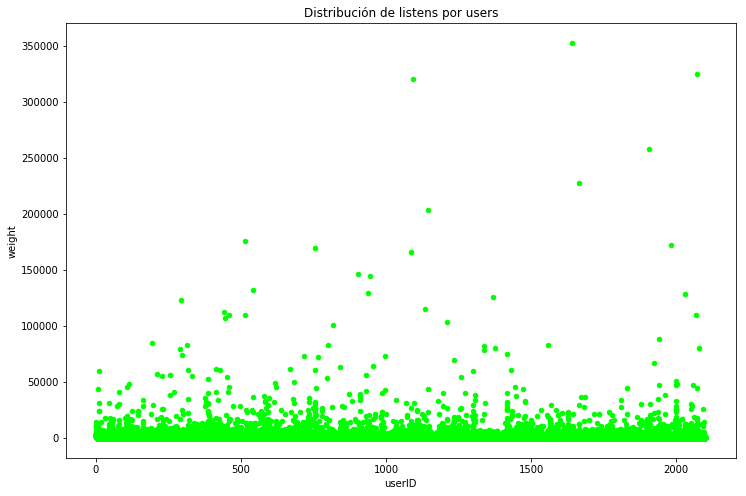

In [13]:
LIMA = '#00ff00'
user_artist_plays.plot(figsize=(12,8), kind='scatter', x='userID', y='weight', title='Distribución de listens por users', color=LIMA)

In [14]:
#Aquí podemos observar la cantidad de users distribuidos según listens
user_artist_plays.groupby(["weight"])["userID"].count()

weight
1         636
2         419
3         338
4         345
5         318
6         311
7         281
8         262
9         295
10        256
11        236
12        251
13        242
14        256
15        220
16        271
17        236
18        217
19        214
20        206
21        226
22        230
23        223
24        224
25        230
26        220
27        230
28        241
29        184
30        185
         ... 
82773       1
82806       1
82951       1
84980       1
88079       1
100761      1
103150      1
107031      1
109484      1
109889      1
110185      1
112009      1
114672      1
123065      1
125471      1
128654      1
129595      1
131733      1
144559      1
146411      1
165902      1
169596      1
172496      1
176133      1
203165      1
227829      1
257978      1
320725      1
324663      1
352698      1
Name: userID, Length: 5436, dtype: int64

In [15]:
#Con el siguiente código observamos quienes son aquellos que tienen de valor de listens 1
user_artist_plays.sort_values(by='weight', ascending=True)[:636]


,userID,artistID,weight
82318,1859,429,1
10646,229,4553,1
10645,229,4552,1
10644,229,4551,1
10636,229,2905,1
12497,270,81,1
12499,270,533,1
12500,270,969,1
10635,229,2840,1
10634,229,2226,1


In [16]:
#Aquí seleccionamos los que más listens tuvieron, por encima de 100000
topweight= user_artist_plays[(user_artist_plays.weight > 50000)]
topweight.describe()

,userID,artistID,weight
count,62.000000,62.000000,62.000000
mean,976.500000,484.677419,107316.935484
std,588.234445,483.544081,68352.760478
min,12.000000,51.000000,50559.000000
25%,447.250000,199.250000,61119.000000
50%,916.500000,377.500000,81368.500000
75%,1360.750000,588.250000,124869.500000
max,2080.000000,2548.000000,352698.000000


In [17]:
#Aquí seleccionamos los que más listens tuvieron, por encima de 100000
user_artist_plays= user_artist_plays[(user_artist_plays.weight< 50000)]


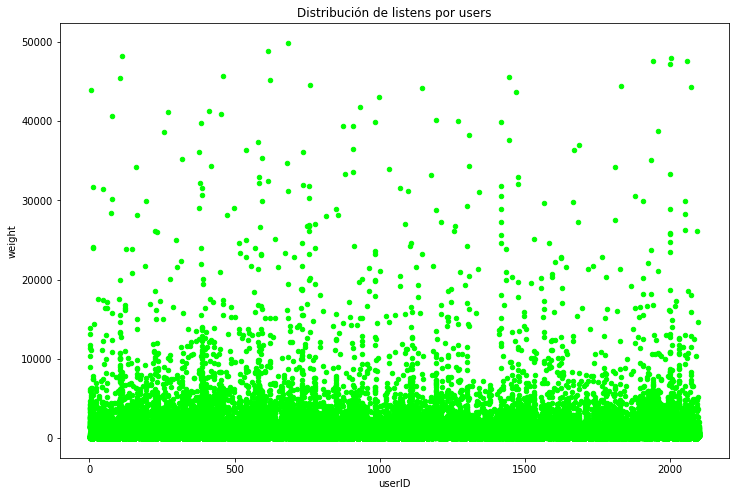

In [18]:
LIMA = '#00ff00'
user_artist_plays.plot(figsize=(12,8), kind='scatter', x='userID', y='weight', title='Distribución de listens por users', color=LIMA)

**Podemos observar que los users que presentan listens mayores a 50000 corresponden a 62 users. Si eliminamos estos valores no se verán modificados a gran escala los resultados.**

# En la próxima consigna buscamos descubrir cuáles son los géneros de música más escuchados

Text(0, 0.5, 'ID de géneros musicales')

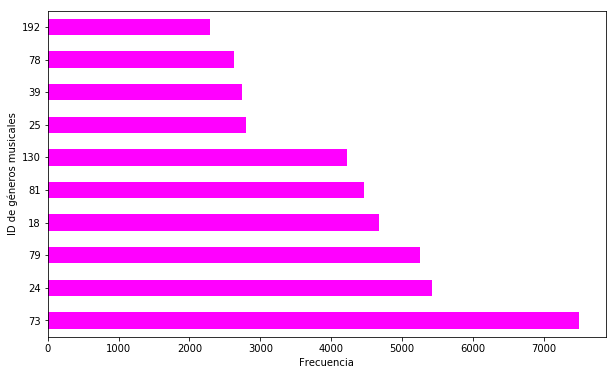

In [19]:
#En el siguiente vemos el top 10 de géneros
plt.figure(figsize=(10,6))
artistgenero.tagID.value_counts().head(10).plot(kind='barh', color='#FF00FF')
plt.xlabel('Frecuencia')
plt.ylabel('ID de géneros musicales')

In [20]:
#El siguiente código lo usamos para conocer a que genero corresponde cada ID
genero[genero['tagID']==192]    #73 rock, 24 pop, 79 alternative, 18 electronic, 81 indie, 130 female vocalists,
#25 80s, 39 dance,78 alternative rock,192 classic rock

,tagID,tagValue
191,192,classic rock


**Entre los primeros 10 observamos que el género más escuchado por amplia diferencia es el Rock, seguido del pop, alternativo, electrónica, indie y female vocalists. Le siguen en sexto lugar en adelante el género de los 80s, dance, alternative rock y classic rock**

## Ejercicio 2 - Matriz de Usuario-Contenido

En este ejercicio, a partir del conjunto de datos, deberán generar una matriz de usuario-contenido. Tengan en cuenta que los ratings, en este caso, son implícitos, puesto que se dan a partir de la cantidad de veces que un usuario escuchó a cierto artista.

In [50]:
from surprise import Dataset, Reader, KNNWithMeans, KNNBasic, NormalPredictor, KNNWithZScore
from surprise.accuracy import rmse
from surprise.model_selection import cross_validate, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import sklearn

from surprise import KNNBaseline, SVD, BaselineOnly, SVDpp, NMF, SlopeOne, CoClustering
from surprise import accuracy

**Procedemos a crear la matriz con los usuarios y artistas a continuación**

In [22]:
df_matrix = pd.pivot_table(user_artist_plays, values='weight', index='userID', columns='artistID').fillna(0)
df_matrix
#Vemos que rellenamos los «huecos» de la matriz con ceros. Y esos ceros serán los que deberemos reemplazar 
#con las recomendaciones.

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,587.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#Ver el % de sparcity que hay

weights = df_matrix.values
sparsity = float(len(weights.nonzero()[0]))
sparsity /= (weights.shape[0] * weights.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 0.28%


In [36]:
reader = Reader(rating_scale=(user_artist_plays.weight.min(), user_artist_plays.weight.max()))
ratings = Dataset.load_from_df(user_artist_plays[["userID", "artistID", "weight"]], reader)

In [37]:
#Dividimos el dataset en conjutno de entremaiento y de test
X_train, X_test = train_test_split(ratings, test_size=0.2, random_state=55)
model = KNNWithMeans(k=5).fit(X_train)
predictions = model.test(X_test)
print("RMSE on test: {:.4f}".format(rmse(predictions, verbose=False)))


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE on test: 1832.2471


In [38]:
#Calculamos en una nueva matriz la similitud entre los usuarios
sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(weights)
print(sim_matrix.shape)

(1892, 1892)


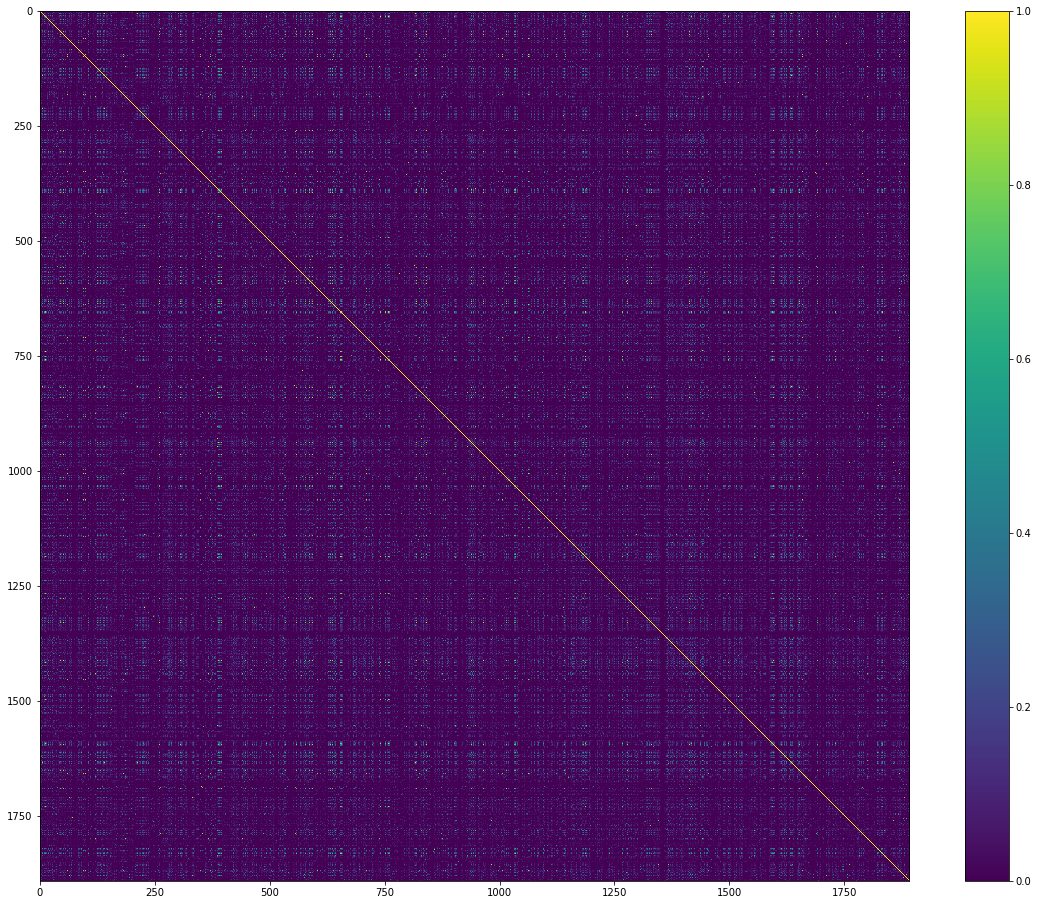

In [39]:
plt.figure(figsize=(20,16))
plt.imshow(sim_matrix);
plt.colorbar()
plt.show()


**Mientras más cercano el número a 1, mayor similitud entre los users**

## Ejercicio 3 - Entrenamiento del algoritmo de recomendación

Utilizando las herramientas brindadas por Surpr!se, entrenen varios modelos de sistemas de recomendación basados en filtrado colaborativo a partir de su matriz de usuario-contenido. Recuerden tener en cuenta lo aprendido en la diplomatura a la hora de evaluar y validar el modelo.

Si necesitan inspiración, les recomiendo revisar [este notebook con información de como entrenar un sistema de recomendación con Surpr!se](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb).

In [40]:
model = KNNWithMeans(k=5, verbose=False)
cross_validated_metrics = cross_validate(model, ratings, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1998.90321918.53281828.32911787.96861800.07521866.761880.3419 
MAE (testset)     658.5918642.9134622.4481638.0213626.7071637.736312.7844 
Fit time          0.94    1.23    1.14    1.07    1.06    1.09    0.09    
Test time         2.98    2.99    3.12    2.78    2.89    2.95    0.11    


## A continuación probaremos diferentes algoritmos para generar las predicciones correspondientes. Entre las que se probarán las que más nos interesan para nuestra resolución son: 
## Los algoritmos de filtrado colaborativo los cuales si bien son bastante básicos, son bien robustos y se basan en la idea de asociar usuarios similares de acuerdo a sus gustos expresados en los listens. Entre ellos tenemos KNNBasic, KNNWithMeans, KNNWithZScore y KNNBaseline.
## Entre los algoritmos que también nos interesa probar se encuentran los basados en factorización matricial como son SVDpp principalmente, el cual tiene en cuenta los ratings implícitos, o Co-clustering.


In [51]:
#Tarda mucho en correr, tratar de verlo nomás
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, ratings, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [53]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,1693.698240,0.261298,0.344263
SlopeOne,1728.926890,57.790813,62.998706
CoClustering,1737.495708,5.904965,0.579407
KNNWithMeans,1880.565418,0.748644,5.802688
KNNBaseline,1885.977121,1.185495,6.273243
NMF,1956.339379,10.726135,0.673891
KNNWithZScore,1993.553250,0.970604,6.142457
KNNBasic,2011.356046,0.680325,5.320472
NormalPredictor,2306.854942,0.236784,0.711861


**Se evaluaron los algoritmos y teniendo en cuenta el RMSE para cada uno el que mejores valores dió fue el BaselineOnly, seguido por el SlopeOne y Coclustering.**



El algoritmo SlopeOne es uno de los de filtrado colaborativo y trabaja con el diferencial de popularidad, que consiste en el promedio de las diferencias entre los ítems, que es usado como medida para predecir las preferencias con respecto a ítems no evaluados. Es un algoritmo fácil de implementar y mantener, además de eficiente.
El algoritmo que peor nos dió fue el SVD y SVDpp, el que en un primer momento nos parecía el adecuado. Inferimos esto debido a que consiste en la factorización de matrices, a través de lo cual deseamos obtener factores latentes, algo que tiene mucha influencia sobre los resultados. Al adentrarnos un poco más en el funcionamiento de este algoritmos descubrimos qu eno funciona muy bien con los datos muy dispersos y corre peligro de overfitting y no poder generalizar.

In [57]:
#ACÁ PROBAMOS CON SGD UTILIZANDOLO COMO BASELINE
print('Using SGD')
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, ratings, measures=['RMSE'], cv=3, verbose=False)

Using SGD
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


{'test_rmse': array([1732.97787165, 1862.4440078 , 1877.40451252]),
 'fit_time': (0.7979950904846191, 0.5963969230651855, 0.6743628978729248),
 'test_time': (0.4971752166748047, 0.288433313369751, 0.46927738189697266)}

**Utilizamos SGD ya que nos da una buena aproximación a los valores faltantes de las matrices dispersas, el uso de regulación disminuye el overfitting, y el cálculo de los factores latentes es menos costoso.**

In [64]:
baselineonly = BaselineOnly(bsl_options=bsl_options)
predictions = baselineonly.fit(X_train).test(X_test)
accuracy.rmse(predictions)

Estimating biases using sgd...
RMSE: 1766.3293


1766.3292835550942

In [66]:
algo2 = CoClustering()
predictions2 = algo2.fit(X_train).test(X_test)
accuracy.rmse(predictions2)

RMSE: 1694.2261


1694.2260971872827

In [67]:
def get_Iu(uid):
    """ nos devuelve el número de items weighted por cada user
    args: 
      uid: El ID del user
    returns: 
      El número de artistID escuchados por user
    """
    try:
        return len(X_train.ur[X_train.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ Devuelve el número de users que escucho el item
    args:
      iid: la columna del artistid
    returns:
      el numero de users que escucharon el item
    """
    try: 
        return len(X_train.ir[X_train.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [68]:
df.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,1727,16353,350.0,673.337146,{'was_impossible': False},44,0,323.337146
1,1891,17449,31.0,653.112044,{'was_impossible': False},39,0,622.112044
2,58,1699,3.0,675.916661,{'was_impossible': False},38,0,672.916661
3,50,229,808.0,665.762952,{'was_impossible': False},32,250,142.237048
4,1125,12510,52.0,655.318635,{'was_impossible': False},36,0,603.318635


In [69]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
582,1404,7147,692.0,691.988921,{'was_impossible': False},39,6,0.011079
3874,59,1707,713.0,712.882338,{'was_impossible': False},40,20,0.117662
8584,231,679,736.0,735.813045,{'was_impossible': False},40,196,0.186955
1223,1793,54,689.0,689.189094,{'was_impossible': False},43,12,0.189094
5897,91,2487,701.0,700.785301,{'was_impossible': False},41,4,0.214699
12501,288,5241,671.0,670.768081,{'was_impossible': False},41,2,0.231919
2514,1150,12687,702.0,701.664937,{'was_impossible': False},40,0,0.335063
16847,1050,418,719.0,718.560987,{'was_impossible': False},39,117,0.439013
3377,370,226,678.0,678.574772,{'was_impossible': False},39,83,0.574772
2538,1016,426,680.0,679.375909,{'was_impossible': False},41,17,0.624091


Las anteriores son las mejores predicciones, y no son conjeturas afortunadas. El Ui está entre 0 y 196, no son realmente pequeños, lo que significa que un número significativo de usuarios ha escuchado a tal artista.

In [70]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
11714,377,917,36052.0,853.433002,{'was_impossible': False},39,141,35198.566998
5228,1671,1369,36365.0,683.776744,{'was_impossible': False},39,107,35681.223256
1445,909,1104,36479.0,714.661265,{'was_impossible': False},33,113,35764.338735
7166,1447,300,37585.0,758.976794,{'was_impossible': False},40,379,36826.023206
8325,1961,294,38765.0,796.146761,{'was_impossible': False},40,131,37968.853239
17280,985,67,39865.0,1170.675538,{'was_impossible': False},43,344,38694.324462
15975,1471,289,43647.0,1729.052527,{'was_impossible': False},38,435,41917.947473
8591,1146,455,44119.0,749.273380,{'was_impossible': False},37,80,43369.726620
9630,2059,292,47630.0,981.454059,{'was_impossible': False},39,316,46648.545941
1523,1942,1014,47632.0,832.198420,{'was_impossible': False},41,40,46799.801580


En la columna uid observamos el userID, en el iid veremos el artistID que escuchará, y en el est será la cantidad de listens predicha. Observamos la ultima fila, donde el artistaID 1014 fue escuchado por 40 usuarios y el user 1942 tuvo como cantidad de listens 47632, pero su valor estimado fue 832 listens. Esto puede deberse a que eliminamos los outliers mayores a 50000 listens, pero quizás hubiera sido mejor limpiar un poco más esos valores atípicos.

## Ejercicio 4 - Sistema de recomendación

A partir del mejor modelo de recomendación que hayan sugerido en el caso anterior, y utilizando los datos del archivo `artist.dat`, armar un sistema de recomendación sencillo que, dado un nombre de un artista, devuelva el top 10 de artistas más similares.

La idea es que el sistema tome el nombre de un artista y devuelva el nombre de otros artistas (no simplemente tomar y devolver IDs). Se recomienda [revisar este notebook para inspiración (ver el paso número 5)](https://github.com/topspinj/pydata-workshop/blob/master/tutorial.ipynb).

In [102]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df['userID'].nunique()
    N = df['artistID'].nunique()

    user_mapper = dict(zip(np.unique(df['userID']), list(range(M))))
    artist_mapper = dict(zip(np.unique(df['artistID']), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df['userID'])))
    artist_inv_mapper = dict(zip(list(range(N)), np.unique(df['artistID'])))
    
    user_index = [user_mapper[i] for i in df['userID']]
    item_index = [artist_mapper[i] for i in df['artistID']]

    X = csr_matrix((df['weight'], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, artist_mapper, user_inv_mapper, artist_inv_mapper

X, user_mapper, artist_mapper, user_inv_mapper, artist_inv_mapper = create_X(user_artist_plays)

**Se calculará la dispersión dividiendo el número de elementos almacenados por el número total de elementos. El número de elementos almacenados (no vacíos) en nuestra matriz es equivalente al número de clasificaciones en nuestro conjunto de datos.**

In [80]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 0.28%


**Como existen usuarios que no tienen tantos listens loq ue se procede a hacer es verificar qué usuarios y artistas tienen pocas interacciones**


In [103]:
#Algo que ya sabíamos
n_weight_per_user = X.getnnz(axis=1)

print(f"Los usuarios más activos escucharon {n_weight_per_user.max()} artistas.")
print(f"Los usuarios menos activos escucharon {n_weight_per_user.min()} artistas.")

Los usuarios más activos escucharon 50 artistas.
Los usuarios menos activos escucharon 1 artistas.


In [104]:
#Algo que también ya sabíamos
n_weight_per_artist = X.getnnz(axis=0)

print(f"El artista más escuchado tiene {n_weight_per_artist.max()} listens.")
print(f"El artista menos escuchado tiene {n_weight_per_artist.min()} listens.")

El artista más escuchado tiene 609 listens.
El artista menos escuchado tiene 1 listens.


**A continuación se normalizan los datos**

In [105]:
sum_weights_per_artist = X.sum(axis=0)
mean_weight_per_artist = sum_weights_per_artist/n_weight_per_artist

**Ahora que tenemos la calificación promedio para cada película, se restará esto de nuestra matriz. Para hacer esto, necesitamos expandir nuestra matriz 1D mean_weight_per_artist en una matriz con la misma forma que nuestra matriz de anterior (userID, artistID). El método de mosaico de Numpy es útil para esta tarea.**

In [85]:
X_mean_artist = np.tile(mean_weight_per_artist, (X.shape[0],1))

In [86]:
X_norm = X - csr_matrix(X_mean_artist)

In [87]:
#Ahora los valores que anteriormente eran ceros, serán representados por valores negativos
print("Normalized X:", X_norm[0].todense())


Normalized X: [[-257.         -667.66666667 -258.33333333 ... -287.
  -286.         -426.        ]]


In [106]:
from sklearn.neighbors import NearestNeighbors

def find_similar_artist(artist_id, X, artist_mapper, artist_inv_mapper, k, metric='cosine'):
    """
    Encuentra k-nearest neighbours por cada artist ID.
    
    Args:
        movie_id: ID del artista de interes
        X: user-item de matriz de utilidad
        k: numero de artistas similares que devuelve
        metric: medida de distancia 
    
    Output: devuelve una lista de k artistas ID similares. 
    """
    X = X.T
    neighbour_ids = []
    
    artist_ind = artist_mapper[artist_id]
    artist_vec = X[artist_ind]
    if isinstance(artist_vec, (np.ndarray)):
        artist_vec = artist_vec.reshape(1,-1)
    # use k+1 since kNN output includes the artistId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(artist_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(artist_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

**Ahora se devuelve una lista de los ID de artistas que son más similares a su artista de interés.**

In [107]:
similar_artist = find_similar_artist(1, X_norm, artist_mapper, artist_inv_mapper, k=10)
similar_artist

[5077, 5085, 5086, 5090, 5091, 5092, 5095, 5096, 5078]

In [94]:
artist_names = dict(zip(artist_data['id'], artist_data['name']))

artist_id = 89

similar_artist = find_similar_artist(artist_id, X_norm, artist_mapper, artist_inv_mapper, metric='cosine', k=10)
artist_name = artist_names[artist_id]

print(f"Porque escuchaste {artist_name}:")
for i in similar_artist:
    print(artist_names[i])


Porque escuchaste Lady Gaga:
La Roux
Restart
The Pussycat Dolls
Natalia Kills
Jessie J
Simon Curtis
3OH!3
Within Temptation
Ke$ha


**Lady Gaga fue una de las artistas escuchada con mayor frecuencia. Podemos observar que para aquellos usuarios que la escucharon se recomienda que también podría interesarles: Le Roux, Restart, The Pussicat Dolls, entre otrxs.**
**Podemos esperar que los recomendados pertenezcan al mismo género del artista buscado.**



Estos resultados se obtuvieron utilizando la distancia al coseno, la cual mide le ángulo entre los vectores.

In [97]:
#Probamos cambiando la distancia Manhattan
artist_names = dict(zip(artist_data['id'], artist_data['name']))

artist_id = 89

similar_artist = find_similar_artist(artist_id, X_norm, artist_mapper, artist_inv_mapper, metric='manhattan', k=10)
artist_name = artist_names[artist_id]

print(f"Porque escuchaste {artist_name}:")
for i in similar_artist:
    print(artist_names[i])

Porque escuchaste Lady Gaga:
The Number Twelve Looks Like You
Bono
Udora
HB
The Reign Of Kindo
Lower Dens
A.F.I.
Meg Lee Chin
Matenrou Opera


In [108]:
#Probamos cambiando la distancia euclídea
artist_names = dict(zip(artist_data['id'], artist_data['name']))

artist_id = 89

similar_artist = find_similar_artist(artist_id, X_norm, artist_mapper, artist_inv_mapper, metric='euclidean', k=10)
artist_name = artist_names[artist_id]

print(f"Porque escuchaste {artist_name}:")
for i in similar_artist:
    print(artist_names[i])

Porque escuchaste Lady Gaga:
Restart
Ke$ha
Jeffree Star
Girls Aloud
Blake Lewis
Meryl Streep
The Saturdays
레인보우
소녀시대


Al utilizar la distancia euclidea (distancia recta más corta entre dos puntos) y la distancia Manhattan ("cantidad de cuadras que hay que hacer para llegar de un punto a otro"), nos damos cuenta que no nos devuelven artistas que nos parezcan relacionados